In [1]:
import pandas as pd
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
print("Missing values in Customers.csv:")
print(customers.isnull().sum())

print("\nMissing values in Products.csv:")
print(products.isnull().sum())

print("\nMissing values in Transactions.csv:")
print(transactions.isnull().sum())

print("\nDuplicate rows in Customers.csv:", customers.duplicated().sum())
print("Duplicate rows in Products.csv:", products.duplicated().sum())
print("Duplicate rows in Transactions.csv:", transactions.duplicated().sum())

print("\nData types in Customers.csv:")
print(customers.dtypes)

print("\nData types in Products.csv:")
print(products.dtypes)

print("\nData types in Transactions.csv:")
print(transactions.dtypes)

Missing values in Customers.csv:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products.csv:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions.csv:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate rows in Customers.csv: 0
Duplicate rows in Products.csv: 0
Duplicate rows in Transactions.csv: 0

Data types in Customers.csv:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Data types in Products.csv:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

Data types in Transactions.csv:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float

In [5]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

print("Transactions data types after conversion:")
print(transactions.dtypes)

print("\nCustomers data types after conversion:")
print(customers.dtypes)

Transactions data types after conversion:
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

Customers data types after conversion:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


In [9]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
print("\nMerged dataset:")
print(merged_data.head())


Merged dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Sp

In [11]:
basic_stats = merged_data[['TotalValue', 'Quantity', 'Price_x']].describe()
print("Basic Statistics for Numerical Columns:")
print(basic_stats)

Basic Statistics for Numerical Columns:
        TotalValue     Quantity     Price_x
count  1000.000000  1000.000000  1000.00000
mean    689.995560     2.537000   272.55407
std     493.144478     1.117981   140.73639
min      16.080000     1.000000    16.08000
25%     295.295000     2.000000   147.95000
50%     588.880000     3.000000   299.93000
75%    1011.660000     4.000000   404.40000
max    1991.040000     4.000000   497.76000


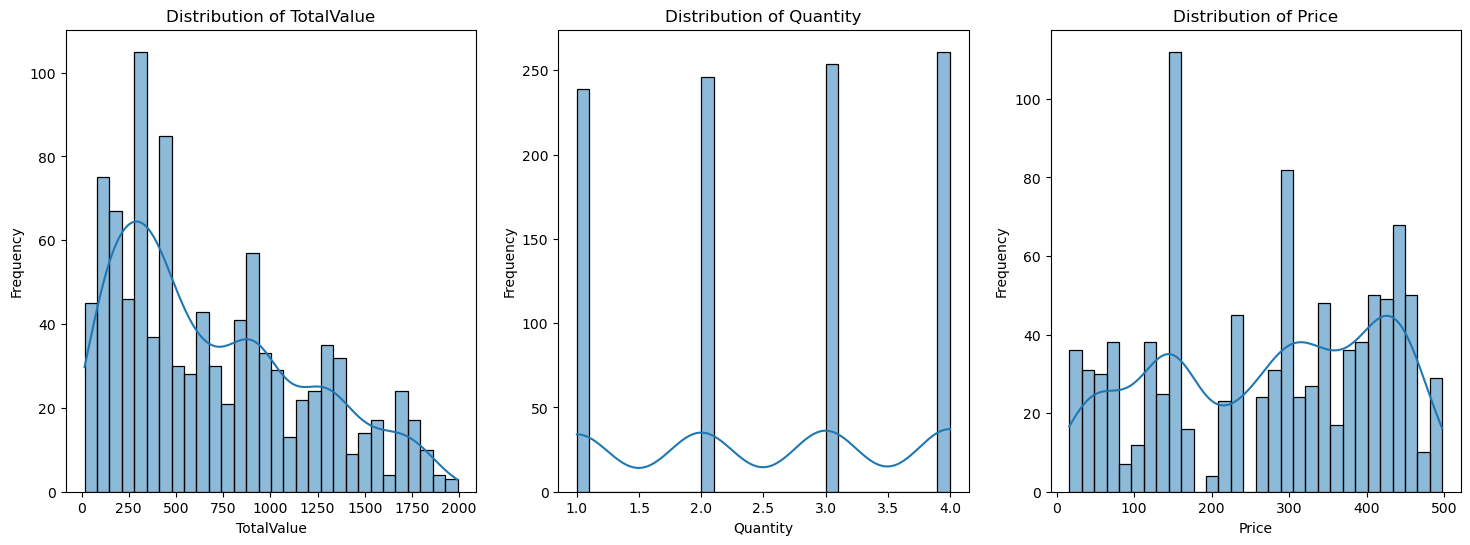

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(merged_data['TotalValue'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of TotalValue')
axes[0].set_xlabel('TotalValue')
axes[0].set_ylabel('Frequency')

sns.histplot(merged_data['Quantity'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')

sns.histplot(merged_data['Price_x'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Price')
axes[2].set_xlabel('Price')
axes[2].set_ylabel('Frequency')

plt.show()

In [20]:
region_freq = merged_data['Region'].value_counts()
category_freq = merged_data['Category'].value_counts()
customer_freq = merged_data['CustomerID'].value_counts()

print("\nFrequency of Transactions by Region:")
print(region_freq)

print("\nFrequency of Transactions by Category:")
print(category_freq)

print("\nTop 10 Customers by Transaction Frequency:")
print(customer_freq.head(10))


Frequency of Transactions by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

Frequency of Transactions by Category:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

Top 10 Customers by Transaction Frequency:
CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


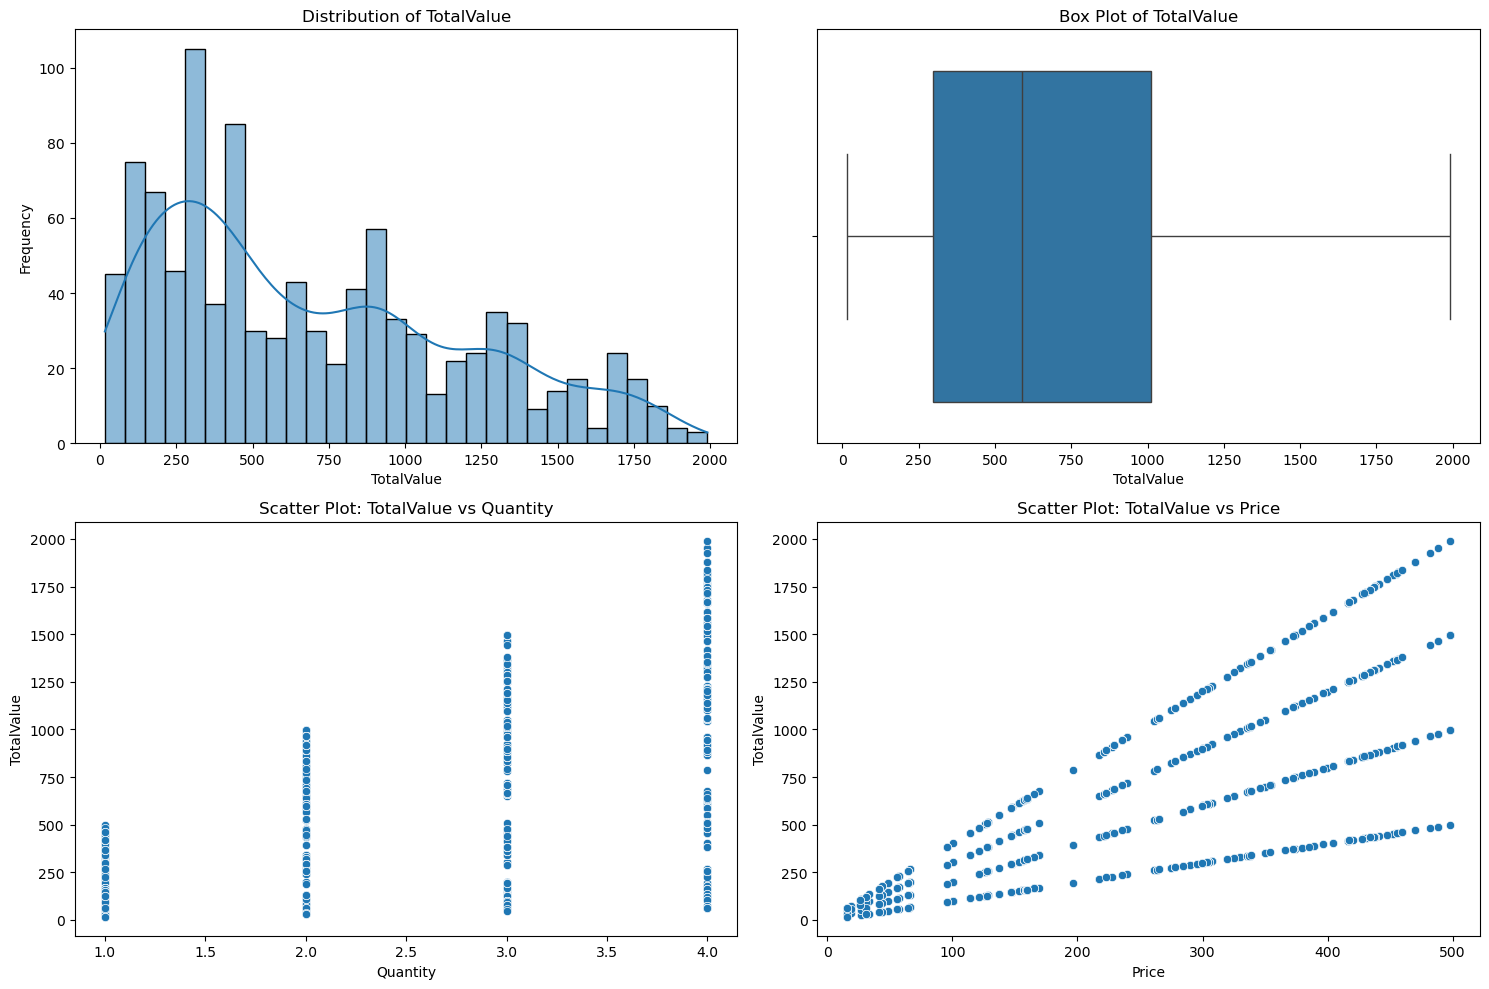

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(merged_data['TotalValue'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of TotalValue')
axes[0, 0].set_xlabel('TotalValue')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=merged_data['TotalValue'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of TotalValue')
axes[0, 1].set_xlabel('TotalValue')

sns.scatterplot(x=merged_data['Quantity'], y=merged_data['TotalValue'], ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot: TotalValue vs Quantity')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('TotalValue')

sns.scatterplot(x=merged_data['Price_x'], y=merged_data['TotalValue'], ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot: TotalValue vs Price')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('TotalValue')

plt.tight_layout()
plt.show()

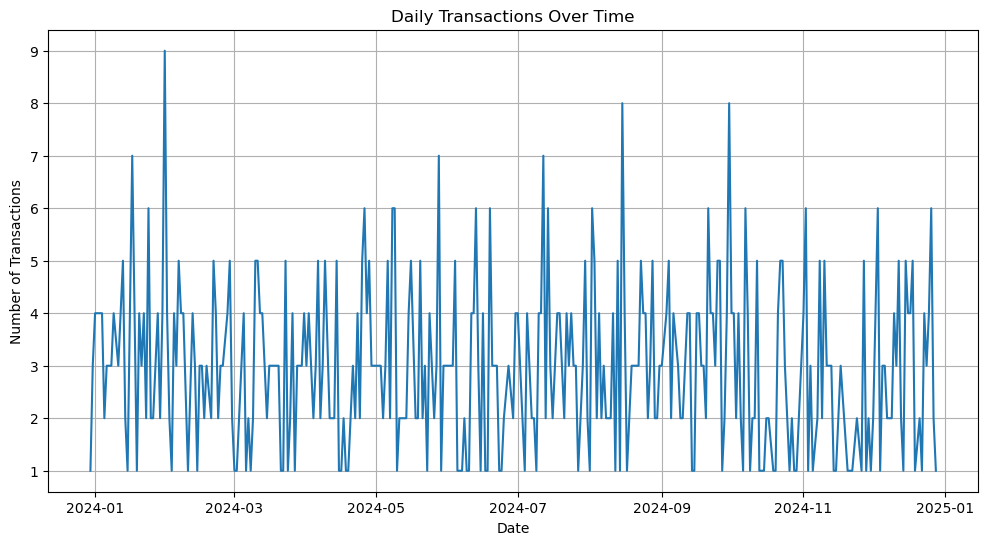

In [24]:
daily_transactions = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TransactionID'].count()

plt.figure(figsize=(12, 6))
daily_transactions.plot()
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

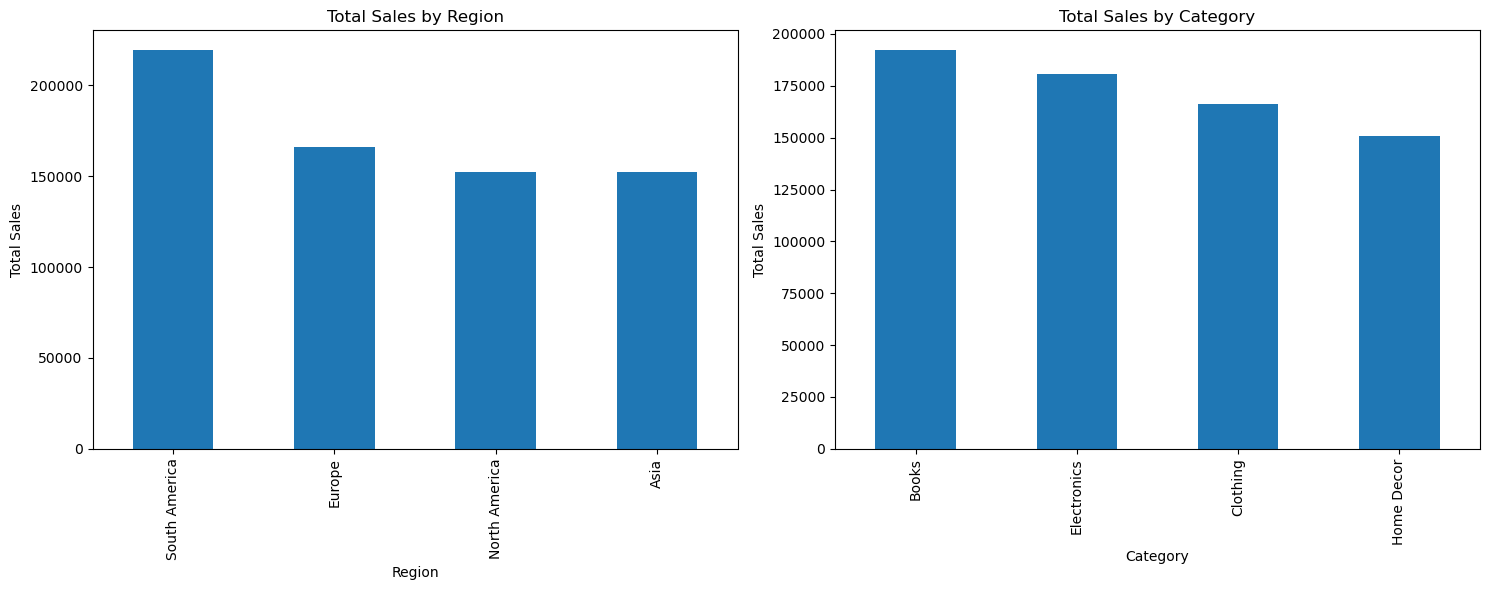

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', ax=axes[0])
axes[0].set_title('Total Sales by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Sales')

category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Sales by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [28]:
correlation_matrix = merged_data[['TotalValue', 'Quantity', 'Price_x']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            TotalValue  Quantity   Price_x
TotalValue    1.000000  0.609972  0.722714
Quantity      0.609972  1.000000 -0.009378
Price_x       0.722714 -0.009378  1.000000


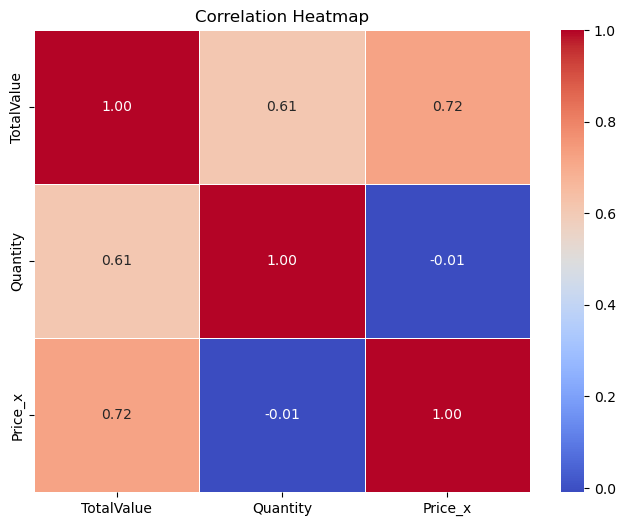

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()